<a href="https://colab.research.google.com/github/hajarattarki/Houseprice-prediction/blob/main/house_predictionANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
df=pd.read_csv("kc_house_data.csv")
print(df)

               id             date  ...  sqft_living15  sqft_lot15
0      7129300520  20141013T000000  ...           1340        5650
1      6414100192  20141209T000000  ...           1690        7639
2      5631500400  20150225T000000  ...           2720        8062
3      2487200875  20141209T000000  ...           1360        5000
4      1954400510  20150218T000000  ...           1800        7503
...           ...              ...  ...            ...         ...
21608   263000018  20140521T000000  ...           1530        1509
21609  6600060120  20150223T000000  ...           1830        7200
21610  1523300141  20140623T000000  ...           1020        2007
21611   291310100  20150116T000000  ...           1410        1287
21612  1523300157  20141015T000000  ...           1020        1357

[21613 rows x 21 columns]


In [11]:
df.drop('id',inplace=True,axis=1)
"""df['date']=pd.to_datetime(df['date'])
df['month']=df['date'].apply(lambda date:date.month)
df['year']=df['date'].apply(lambda date:date.year)"""
df.drop('date',inplace=True,axis=1)
df.drop('zipcode',inplace=True,axis=1)
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [12]:
x=df.drop('price',axis=1)
y=df['price']
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import  MinMaxScaler
print(x)
x.columns

       bedrooms  bathrooms  sqft_living  ...     long  sqft_living15  sqft_lot15
0             3       1.00         1180  ... -122.257           1340        5650
1             3       2.25         2570  ... -122.319           1690        7639
2             2       1.00          770  ... -122.233           2720        8062
3             4       3.00         1960  ... -122.393           1360        5000
4             3       2.00         1680  ... -122.045           1800        7503
...         ...        ...          ...  ...      ...            ...         ...
21608         3       2.50         1530  ... -122.346           1530        1509
21609         4       2.50         2310  ... -122.362           1830        7200
21610         2       0.75         1020  ... -122.299           1020        2007
21611         3       2.50         1600  ... -122.069           1410        1287
21612         2       0.75         1020  ... -122.299           1020        1357

[21613 rows x 17 columns]


Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [13]:
x.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650
1,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,47.7210,-122.319,1690,7639
2,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,47.7379,-122.233,2720,8062
3,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,47.5208,-122.393,1360,5000
4,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,47.6168,-122.045,1800,7503


In [14]:
print(y)

0        221900.0
1        538000.0
2        180000.0
3        604000.0
4        510000.0
           ...   
21608    360000.0
21609    400000.0
21610    402101.0
21611    400000.0
21612    325000.0
Name: price, Length: 21613, dtype: float64


In [15]:
X_train, X_test, y_train, y_test=train_test_split(x,y,test_size=0.3,random_state=101)
scaler=MinMaxScaler()

X_train_scaled=scaler.fit_transform(X_train)
x_test_scaled=scaler.transform(X_test)
X_train.shape

(15129, 17)

In [16]:
print(X_train_scaled.shape)
print(x_test_scaled.shape)

(15129, 17)
(6484, 17)


In [17]:
from sklearn import metrics
def print_evaluate(true,predicted,train=True):
  mae=metrics.mean_absolute_error(true,predicted)
  mse=metrics.mean_squared_error(true,predicted)
  rmse=np.sqrt(metrics.mean_absolute_error(true,predicted))
  r2_square=metrics.r2_score(true,predicted)
  if train:
    print("=======Training result=====")
    print("mae:", mae)
    print("mse:", mse)
    print("rmse:", rmse)
    print("r2_square:", r2_square)
  elif not train:
    print("=======Test result=====")
    print("mae:", mae)
    print("mse:", mse)
    print("rmse:", rmse)
    print("r2_square:", r2_square)


In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Input,Activation,Dropout
from tensorflow.keras.optimizers import Adam

In [22]:
model=Sequential()
model.add(Dense(X_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1))

model.compile(optimizer=Adam(0.001),loss='mse')
r=model.fit(X_train,y_train.values,
            validation_data=(X_test,y_test.values),
            batch_size=128,
            epochs=500)


Epoch 1/500
119/119 [==============================] - 1s 6ms/step - loss: 379688471210.6667 - val_loss: 327418609664.0000
Epoch 2/500
119/119 [==============================] - 0s 2ms/step - loss: 333194287240.5333 - val_loss: 254438146048.0000
Epoch 3/500
119/119 [==============================] - 0s 2ms/step - loss: 198720804727.4667 - val_loss: 92033859584.0000
Epoch 4/500
119/119 [==============================] - 0s 3ms/step - loss: 77813642854.4000 - val_loss: 79101493248.0000
Epoch 5/500
119/119 [==============================] - 0s 2ms/step - loss: 75966840797.8667 - val_loss: 77148725248.0000
Epoch 6/500
119/119 [==============================] - 0s 2ms/step - loss: 77474875665.0667 - val_loss: 74985316352.0000
Epoch 7/500
119/119 [==============================] - 0s 2ms/step - loss: 83222323404.8000 - val_loss: 73744891904.0000
Epoch 8/500
119/119 [==============================] - 0s 2ms/step - loss: 75626130705.0667 - val_loss: 72222523392.0000
Epoch 9/500
119/119 [======

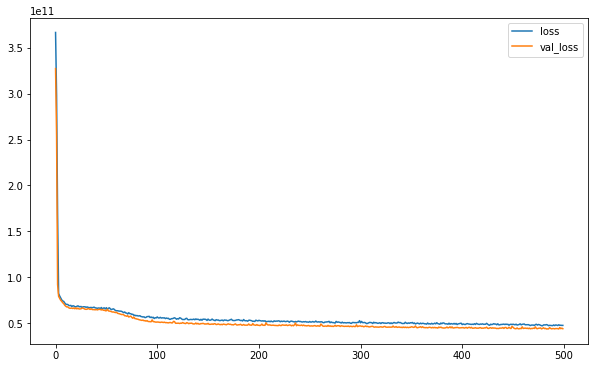

In [23]:
plt.figure(figsize=(10,6))
plt.plot(r.history['loss'],label="loss")
plt.plot(r.history['val_loss'],label="val_loss")
plt.legend()
plt.show()

In [24]:
y_train_pred=model.predict(X_train)
y_test_pred=model.predict(X_test)
print_evaluate(y_train,y_train_pred,train=True)
print_evaluate(y_test,y_test_pred,train=False)

=======Training result=====
mae: 138367.35971685173
mse: 44102286195.83866
rmse: 371.97763335562496
r2_square: 0.6669485308158709
=======Test result=====
mae: 138882.23517745605
mse: 43840204380.90976
rmse: 372.66906925240795
r2_square: 0.6874693633367394
